# Assignment 04:


This Week's assignment we will use machine learning models to classify the air quality.


Before starting copy this file and work on your own copy by following the below steps:

<br>

`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 04: - Muntahder Al-kaabi).

<br>

[Dataset](https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india)

<br>

Requirements:

1. Import all necessary libraries.
2. Read the dataset csv file using pandas.
4. Show the dataset info.
5. Get the number of missing values in dataset for each columns.
3. Plot the dataframe
3. Describe the dataset using pandas.
4. Drop the following columns 'City', 'Datetime', 'AQI'
6. Remove all the missing values.
3. Plot the AQI_Bucket
3. Create a new balanced dataset 
3. Plot the new AQI_Bucket
7. Convert the labels to numerical values
3. Split the data to feature and labels
3. Scale the features
3. Define a function to split the data
3. Modeling




Good luck and feel free to ask any question.

# Download the dataset using kaggle

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download -d rohanrao/air-quality-data-in-india

 97% 71.0M/72.9M [00:02<00:00, 43.9MB/s]
100% 72.9M/72.9M [00:02<00:00, 32.0MB/s]


In [3]:
!unzip /content/air-quality-data-in-india.zip

Archive:  /content/air-quality-data-in-india.zip
  inflating: city_day.csv            
  inflating: city_hour.csv           
  inflating: station_day.csv         
  inflating: station_hour.csv        
  inflating: stations.csv            


# import all necessary libraries

In [53]:
# Write code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import (
    datasets,
    model_selection,
    linear_model,
    metrics,
    neighbors,
    tree,
    ensemble,
    svm,
    preprocessing
)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.linear_model import LogisticRegression

# Read the Dataset 

In [5]:
# Write code here
df = pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


# Preprocessing the Dataset 

## Show the dataset info

In [6]:
# Write code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


## Get the number of missing values in dataset for each columns

In [7]:
# Write code here
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

## Plot the data

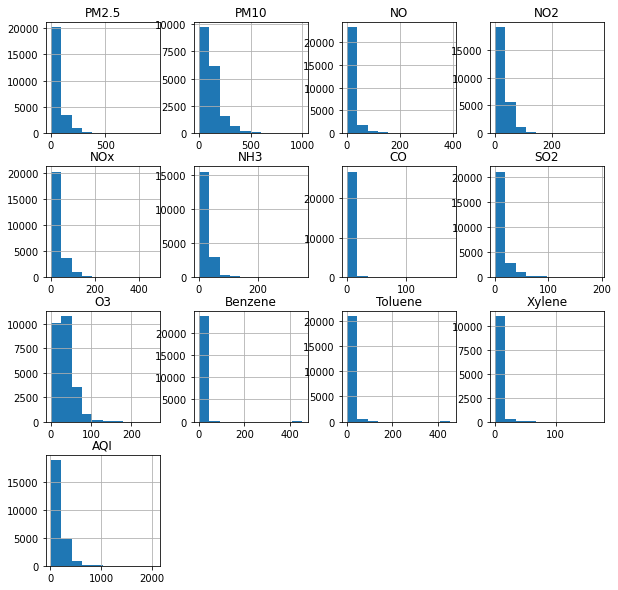

In [8]:
# Write code here
df.hist(figsize=(10, 10))
plt.show()

expected output 

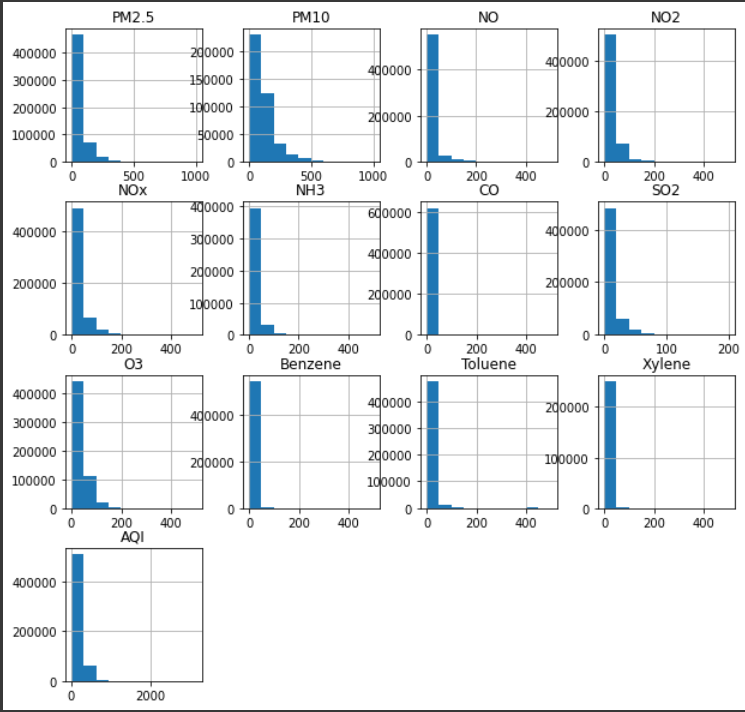



## Describe the dataset using pandas.

In [9]:
# The describe() method returns description of the data in the DataFrame.
# Write code here
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


## Drop the following columns 'City', 'Datetime', 'AQI'

In [10]:
# Write code here
df.drop(columns=['City','AQI','Date'],inplace=True)
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,Good
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,Satisfactory
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,Satisfactory
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,Satisfactory


## Remove all the missing values.


In [11]:
# Write code here
df.dropna(inplace=True) 

In [12]:
df.isna().sum()

PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI_Bucket    0
dtype: int64

## Plot the AQI_Bucket

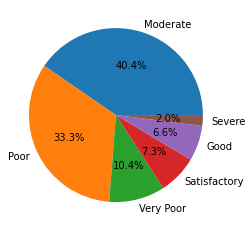

In [13]:
# Write code here
plt.pie(df['AQI_Bucket'].value_counts(),
        labels=df['AQI_Bucket'].unique(),
        autopct='%.1f%%')
plt.show()

expected output

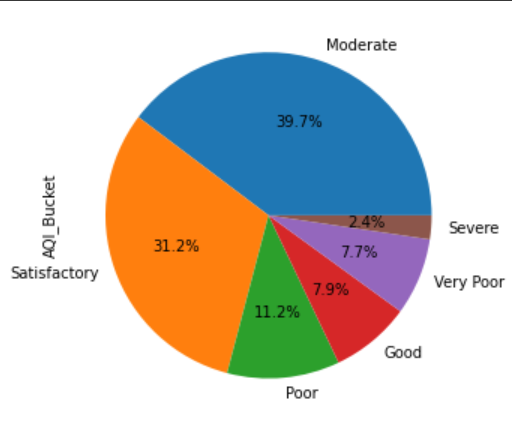


# Create a new balanced dataset 


In [14]:
df.AQI_Bucket.value_counts()

Moderate        2521
Satisfactory    2079
Poor             648
Good             454
Very Poor        410
Severe           124
Name: AQI_Bucket, dtype: int64

In [15]:
# create a new dataset that has balance classes in label column (AQI_BUCKET)
# Write code here
from imblearn.over_sampling import SMOTE

In [16]:
def tokenizer(col):
    word_id={}
    id_word = {}
    for id,word in enumerate(col.unique()):
        word_id[word]=id 
        id_word[id] = word
    return word_id,id_word

In [17]:
new_df = df.copy()

In [18]:
label_id , id_label = tokenizer(new_df.AQI_Bucket)
new_df.AQI_Bucket.replace(label_id,inplace=True)

In [19]:
x = new_df.drop(columns=['AQI_Bucket'])
y = new_df.AQI_Bucket

In [20]:
resampler = SMOTE()
x,y  = resampler.fit_resample(x, y)
x

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,81.400000,124.500000,1.440000,20.500000,12.080000,10.720000,0.120000,15.240000,127.090000,0.200000,6.500000,0.060000
1,78.320000,129.060000,1.260000,26.000000,14.850000,10.280000,0.140000,26.960000,117.440000,0.220000,7.950000,0.080000
2,88.760000,135.320000,6.600000,30.850000,21.770000,12.910000,0.110000,33.590000,111.810000,0.290000,7.630000,0.120000
3,64.180000,104.090000,2.560000,28.070000,17.010000,11.420000,0.090000,19.000000,138.180000,0.170000,5.020000,0.070000
4,72.470000,114.840000,5.230000,23.200000,16.590000,12.250000,0.160000,10.550000,109.740000,0.210000,4.710000,0.080000
...,...,...,...,...,...,...,...,...,...,...,...,...
15121,287.061669,448.250801,99.262103,78.861723,126.542329,55.165719,3.002233,17.982464,43.114847,10.163645,82.345092,2.704842
15122,144.649997,310.299197,29.326195,57.078349,71.969901,33.217599,6.082484,17.052130,57.749755,4.514766,20.171774,3.371584
15123,245.988893,444.878135,104.948113,91.509688,150.586752,64.418548,2.700575,20.516495,115.624548,8.180667,24.644059,2.552484
15124,266.866529,453.858304,89.107268,66.167407,120.259418,55.202182,2.737820,16.293912,41.345300,8.556126,56.307445,4.894743


In [21]:
new_df = pd.concat([x,y],axis=1)
new_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
0,81.400000,124.500000,1.440000,20.500000,12.080000,10.720000,0.120000,15.240000,127.090000,0.200000,6.500000,0.060000,0
1,78.320000,129.060000,1.260000,26.000000,14.850000,10.280000,0.140000,26.960000,117.440000,0.220000,7.950000,0.080000,0
2,88.760000,135.320000,6.600000,30.850000,21.770000,12.910000,0.110000,33.590000,111.810000,0.290000,7.630000,0.120000,0
3,64.180000,104.090000,2.560000,28.070000,17.010000,11.420000,0.090000,19.000000,138.180000,0.170000,5.020000,0.070000,0
4,72.470000,114.840000,5.230000,23.200000,16.590000,12.250000,0.160000,10.550000,109.740000,0.210000,4.710000,0.080000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15121,287.061669,448.250801,99.262103,78.861723,126.542329,55.165719,3.002233,17.982464,43.114847,10.163645,82.345092,2.704842,5
15122,144.649997,310.299197,29.326195,57.078349,71.969901,33.217599,6.082484,17.052130,57.749755,4.514766,20.171774,3.371584,5
15123,245.988893,444.878135,104.948113,91.509688,150.586752,64.418548,2.700575,20.516495,115.624548,8.180667,24.644059,2.552484,5
15124,266.866529,453.858304,89.107268,66.167407,120.259418,55.202182,2.737820,16.293912,41.345300,8.556126,56.307445,4.894743,5


In [22]:
new_df.duplicated().sum()

0

In [23]:
new_df.AQI_Bucket.value_counts()

0    2521
1    2521
2    2521
3    2521
4    2521
5    2521
Name: AQI_Bucket, dtype: int64

expected output

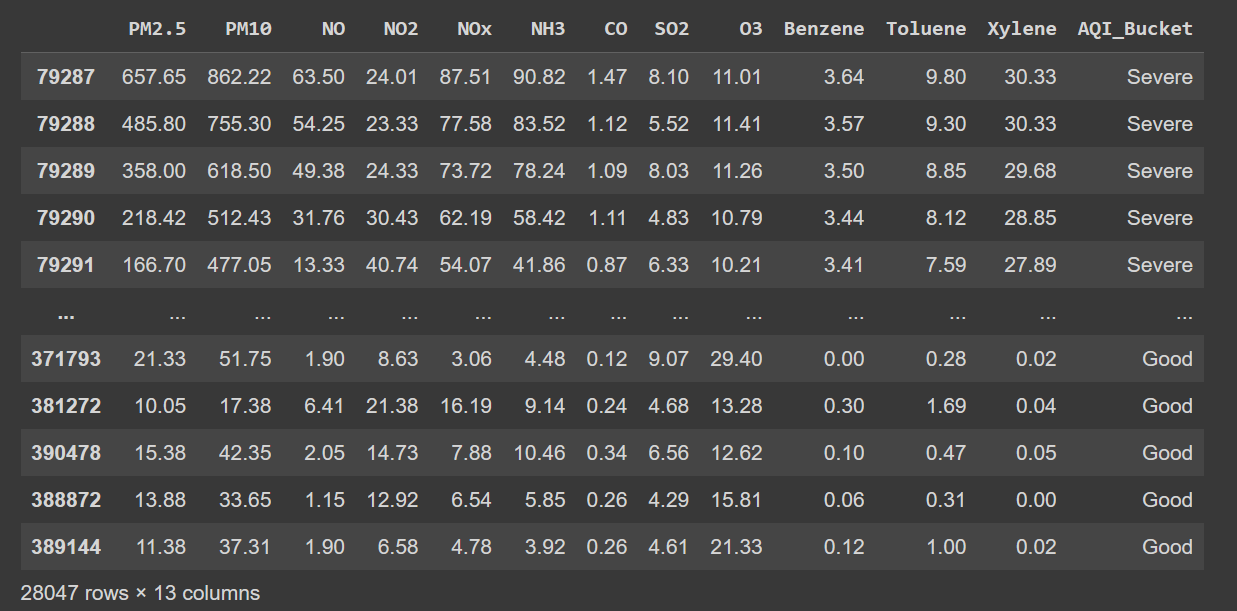

# Plot the AQI_Bucket column in the new dataframe

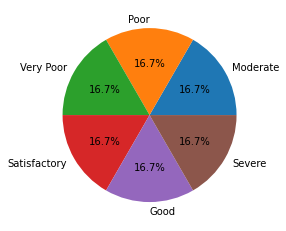

In [24]:
# Plot the AQI_Bucket column in the new dataframe
# Write code here
plt.pie(
    new_df['AQI_Bucket'].value_counts(), 
    autopct='%.1f%%',
    labels= df['AQI_Bucket'].unique())
plt.show()

expected output

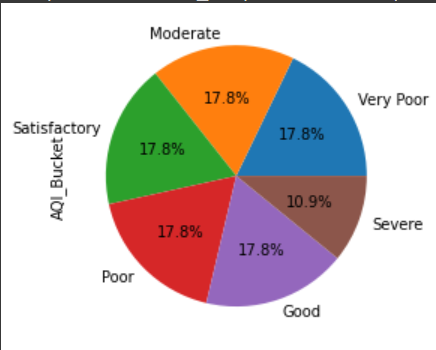


# Convert the labels to numerical value


In [25]:
# convert the labels (AQI_BUCKET) to numerical value
# Write code here

# Split the data to features and labels 

In [26]:
# Write code here

### I did the conversion and splitting previously 👆👆

# Scale the features


In [27]:
# Scale the feature values to mean = 0, std=1
# Write code here
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.26989945, -0.44055245, -0.897786  , ..., -0.81530358,
        -0.50870939, -0.54231767],
       [-0.30050598, -0.40950161, -0.90383367, ..., -0.81154286,
        -0.42876574, -0.53791294],
       [-0.19676178, -0.36687481, -0.72441947, ..., -0.79838034,
        -0.44640848, -0.52910348],
       ...,
       [ 1.36565054,  1.74102822,  2.57989658, ...,  0.68534924,
         0.49163711,  0.00661791],
       [ 1.57311543,  1.80217773,  2.04767327, ...,  0.75594919,
         2.23735221,  0.52246856],
       [-0.20126396,  1.99641787, -0.50231065, ..., -0.62974255,
        -0.7466092 ,  0.08655359]])

# Define a function to split the data

In [29]:
# Define a function to split our dataset into train/test splits using indices
# The function should accept as input (X, Y, train_indices, test_indices)
# The function should return as output (x_train, x_test, y_train, y_test)

def train_test_split(x,y,train_indices,test_indices):
  return x[train_indices], x[test_indices], y[train_indices], y[test_indices]


#Modeling

*   use cross valdation method to analysis what is the best machine learning model for the task

*   atleast use five different models

*  after finding the best model train it on the data



In [50]:
def train_predict(model):
    model.fit(x_train, y_train)
    y_pred = m1.predict(x_test)
    return y_pred

In [66]:
k_fold = model_selection.KFold(
    n_splits=10
) 

metric_evaluation_dict = {'Random Forest Classifier':[],'SVC':[],'Logistic Regression':[]}


for train_indices, test_indices in k_fold.split(x):
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        train_indices, 
                                                        test_indices)
    # Train 1st model
    m1 = RandomForestClassifier(random_state=42,n_estimators=140)
    m1.fit(x_train, y_train)
    # Predict using test set
    y_pred = m1.predict(x_test)
    # Calculate scores
    metric_evaluation_dict['Random Forest Classifier'].append( metrics.accuracy_score(y_test, y_pred) )


    # 2nd model
    m2 = svm.LinearSVC(multi_class='ovr',C=10)
    m2.fit(x_train, y_train)
    y_pred = m2.predict(x_test)
    metric_evaluation_dict['SVC'].append( metrics.accuracy_score(y_test, y_pred) )


    # 3rd model
    m3 = LogisticRegression(random_state=42, multi_class='ovr')
    m3.fit(x_train, y_train)
    y_pred = m3.predict(x_test)
    metric_evaluation_dict['Logistic Regression'].append( metrics.accuracy_score(y_test, y_pred) )


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [67]:
metric_evaluation_dict

{'Random Forest Classifier': [0.7865168539325843,
  0.7713152676801057,
  0.838070059484468,
  0.7851949768671513,
  0.9253139458030403,
  0.9431592861863847,
  0.921957671957672,
  0.9629629629629629,
  0.9775132275132276,
  0.955026455026455],
 'SVC': [0.38797091870456046,
  0.46860541969596825,
  0.5459352280237938,
  0.4467944481163252,
  0.1533377395902181,
  0.43952412425644416,
  0.37632275132275134,
  0.7724867724867724,
  0.9411375661375662,
  0.8617724867724867],
 'Logistic Regression': [0.356906807666887,
  0.4950429610046266,
  0.4990085922009253,
  0.4454725710508923,
  0.16853932584269662,
  0.4712491738268341,
  0.3776455026455027,
  0.7175925925925926,
  0.916005291005291,
  0.8485449735449735]}

In [68]:
for model in metric_evaluation_dict.items():
      print(model[0],np.array(model[1]).mean())

Random Forest Classifier 0.8867030707414052
SVC 0.5393887455106887
Logistic Regression 0.5296007791381221
